In [32]:
import os
import sys
import pandas as pd

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from matplotlib import pyplot as plt
from src.models.rule_based import add_rule_score, recommend_best_offer_for_user

NBO_DATASET_PATH = os.path.join(PROJECT_ROOT, "data", "processed", "nbo_dataset.csv")
df = pd.read_csv(NBO_DATASET_PATH)

df_scored = add_rule_score(df)

df.head(), df_scored.head()

(   user_id  offer_id  recency_days  frequency_30d  frequency_90d  \
 0    17850         0           371              0              0   
 1    17850         2           371              0              0   
 2    17850         2           371              0              0   
 3    17850         1           371              0              0   
 4    13047         1            31              0             32   
 
    monetary_90d  avg_purchase_value  category_encoded  channel_encoded  \
 0          0.00           18.152222                 0                2   
 1          0.00           18.152222                 0                2   
 2          0.00           18.152222                 0                1   
 3          0.00           18.152222                 0                1   
 4        555.53           18.822907                 8                1   
 
    treatment  outcome_click  outcome_purchase  time_afternoon  time_evening  \
 0          1              0                 0      

In [33]:
NBO_DATASET_PATH = os.path.join(PROJECT_ROOT, "data", "processed", "nbo_dataset.csv")

df = pd.read_csv(NBO_DATASET_PATH)
df.head()

,user_id,offer_id,recency_days,frequency_30d,frequency_90d,monetary_90d,avg_purchase_value,category_encoded,channel_encoded,treatment,outcome_click,outcome_purchase,time_afternoon,time_evening,time_morning,time_night
0,17850,0,371,0,0,0.00,18.152222,0,2,1,0,0,False,False,True,False
1,17850,2,371,0,0,0.00,18.152222,0,2,0,0,0,False,True,False,False
2,17850,2,371,0,0,0.00,18.152222,0,1,0,0,0,False,True,False,False
3,17850,1,371,0,0,0.00,18.152222,0,1,0,0,0,False,False,False,True
4,13047,1,31,0,32,555.53,18.822907,8,1,0,0,0,False,False,True,False


In [34]:
NBO_DATASET_PATH = os.path.join(PROJECT_ROOT, "data", "processed", "nbo_dataset.csv")

df = pd.read_csv(NBO_DATASET_PATH)
df.head()

,user_id,offer_id,recency_days,frequency_30d,frequency_90d,monetary_90d,avg_purchase_value,category_encoded,channel_encoded,treatment,outcome_click,outcome_purchase,time_afternoon,time_evening,time_morning,time_night
0,17850,0,371,0,0,0.00,18.152222,0,2,1,0,0,False,False,True,False
1,17850,2,371,0,0,0.00,18.152222,0,2,0,0,0,False,True,False,False
2,17850,2,371,0,0,0.00,18.152222,0,1,0,0,0,False,True,False,False
3,17850,1,371,0,0,0.00,18.152222,0,1,0,0,0,False,False,False,True
4,13047,1,31,0,32,555.53,18.822907,8,1,0,0,0,False,False,True,False


In [35]:
NBO_DATASET_PATH = os.path.join(PROJECT_ROOT, "data", "processed", "nbo_dataset.csv")

df = pd.read_csv(NBO_DATASET_PATH)
df.head()

,user_id,offer_id,recency_days,frequency_30d,frequency_90d,monetary_90d,avg_purchase_value,category_encoded,channel_encoded,treatment,outcome_click,outcome_purchase,time_afternoon,time_evening,time_morning,time_night
0,17850,0,371,0,0,0.00,18.152222,0,2,1,0,0,False,False,True,False
1,17850,2,371,0,0,0.00,18.152222,0,2,0,0,0,False,True,False,False
2,17850,2,371,0,0,0.00,18.152222,0,1,0,0,0,False,True,False,False
3,17850,1,371,0,0,0.00,18.152222,0,1,0,0,0,False,False,False,True
4,13047,1,31,0,32,555.53,18.822907,8,1,0,0,0,False,False,True,False


In [36]:
df_scored[
    [
        "user_id",
        "offer_id",
        "recency_days",
        "frequency_30d",
        "frequency_90d",
        "monetary_90d",
        "avg_purchase_value",
        "channel_encoded",
        "time_morning",
        "time_afternoon",
        "time_evening",
        "time_night",
        "rule_score",
        "outcome_click"
    ]
].sort_values("rule_score", ascending=False).head(10)

,user_id,offer_id,recency_days,frequency_30d,frequency_90d,monetary_90d,avg_purchase_value,channel_encoded,time_morning,time_afternoon,time_evening,time_night,rule_score,outcome_click
9178,16446,2,0,1,1,168469.60,56157.500000,1,False,False,True,False,9.2,0
2925,14646,1,1,215,701,101903.40,134.714433,1,False,False,True,False,9.2,0
3595,17389,1,0,42,92,22329.60,149.453897,1,False,False,True,False,9.2,0
3596,17389,0,0,42,92,22329.60,149.453897,1,False,False,True,False,9.2,1
1276,17450,0,7,69,152,108780.45,577.302047,1,False,False,True,False,9.2,1
1275,17450,1,7,69,152,108780.45,577.302047,1,False,False,True,False,9.2,0
2759,16684,1,3,32,109,32770.06,240.626570,1,False,True,False,False,8.9,1
9177,16446,0,0,1,1,168469.60,56157.500000,1,False,True,False,False,8.9,1
2758,16684,0,3,32,109,32770.06,240.626570,1,False,True,False,False,8.9,1
9175,16446,0,0,1,1,168469.60,56157.500000,1,False,True,False,False,8.9,1


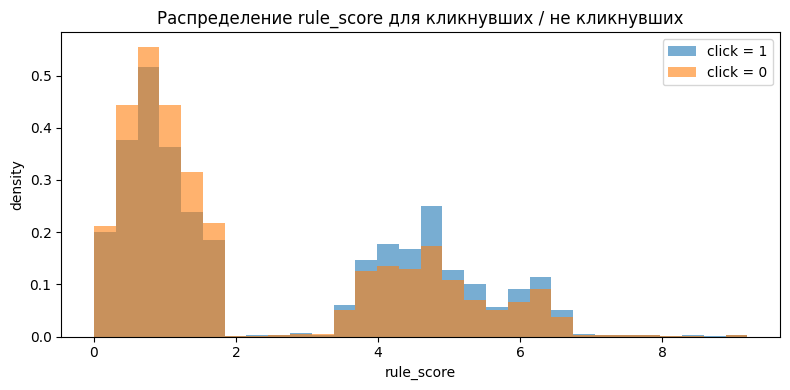

In [37]:
plt.figure(figsize=(8, 4))

clicked = df_scored[df_scored["outcome_click"] == 1]["rule_score"]
not_clicked = df_scored[df_scored["outcome_click"] == 0]["rule_score"]

plt.hist(clicked, bins=30, alpha=0.6, label="click = 1", density=True)
plt.hist(not_clicked, bins=30, alpha=0.6, label="click = 0", density=True)

plt.xlabel("rule_score")
plt.ylabel("density")
plt.title("Распределение rule_score для кликнувших / не кликнувших")
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
example_user = df_scored["user_id"].iloc[0]
best_offer_id, best_score = recommend_best_offer_for_user(df_scored, example_user)

print(f"Пользователь: {example_user}")
print(f"Рекомендованный оффер (rule-based): {best_offer_id}, score = {best_score:.3f}")

df_scored[(df_scored["user_id"] == example_user)][[
    "offer_id",
    "rule_score",
    "outcome_click"
]].sort_values("rule_score", ascending=False).head(10)

Пользователь: 17850
Рекомендованный оффер (rule-based): 2, score = 1.700


,offer_id,rule_score,outcome_click
2,2,1.7,0
1,2,1.2,0
3,1,1.2,0
0,0,0.5,0


In [39]:
clicked = df_scored[df_scored["outcome_click"] == 1]["rule_score"]
not_clicked = df_scored[df_scored["outcome_click"] == 0]["rule_score"]

clicked.head(), not_clicked.head()

(7     5.5
 8     6.7
 9     5.9
 10    1.2
 11    1.4
 Name: rule_score, dtype: float64,
 0    0.5
 1    1.2
 2    1.7
 3    1.2
 4    1.0
 Name: rule_score, dtype: float64)